In [1]:
# Import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(tf.__version__)

2.13.0


In [3]:
data = pd.read_csv('preprocessing_data.csv')
data.head()

,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area
0,185000.0,2023-10-13,Terraced,3,1,Freehold,"['Oil Central Heating', 'Freehold Semi-Detache...",Spacious 3 Bedroom Semi-Detached property situ...,NaN,"Penllwyn Estate, Capel Bangor, Aberystwyth","M S PROPERTIES (UK) LIMITED, Aberystwyth","23 Chalybeate Street,\r\nAberystwyth,\r\nSY23 1HX",https://www.rightmove.co.uk/properties/8664108...,Mid Wales,Ceredigion
1,875000.0,2023-06-16,Detached,5,3,Freehold,"['** Iconic Victorian residence **', '** 5 Bed...",** Fully refurbished Victorian town house ** H...,Band: C,"Llanbadarn Road, Llanbadarn Fawr, Aberystwyth,...","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1315985...,Mid Wales,Ceredigion
2,875000.0,2022-06-01,Detached,10,6,Freehold,"['EPC: E', 'Council Tax Band: F', 'Broadband-...","Windrush House, dating back to 1872, has under...",Band: F,"Windrush, Llanrhystud, Ceredigion.","Fine and Country West Wales, Aberystwyth",The Gallery\r\nStation Approach\r\nAlexandra R...,https://www.rightmove.co.uk/properties/8539838...,Mid Wales,Ceredigion
3,860000.0,2023-08-01,Detached,6,1,Freehold,['Handsome country house. Wealth of character ...,Handsome late Georgian country house enjoying ...,Band: G,"Llanilar, Aberystwyth, Ceredigion, SY23","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1238905...,Mid Wales,Ceredigion
4,835000.0,2023-01-04,Detached,5,6,Freehold,['** Nothing Compares - Exclusive Seaside Prop...,Nothing Compares ! An exclusive seaside proper...,NaN,"Lewis Terrace, New Quay , SA45","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1378149...,Mid Wales,Ceredigion


In [4]:
data_new = data.drop(['date','key_features','description_text','address','agent_name','agent_address','url'], axis=1)
data_new.head()

,price,property_type,bedrooms,bathrooms,tenure,council_tax,part,area
0,185000.0,Terraced,3,1,Freehold,NaN,Mid Wales,Ceredigion
1,875000.0,Detached,5,3,Freehold,Band: C,Mid Wales,Ceredigion
2,875000.0,Detached,10,6,Freehold,Band: F,Mid Wales,Ceredigion
3,860000.0,Detached,6,1,Freehold,Band: G,Mid Wales,Ceredigion
4,835000.0,Detached,5,6,Freehold,NaN,Mid Wales,Ceredigion


#### LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()

In [7]:
# List of column names to label encode
columns_to_encode = ['property_type', 'tenure', 'council_tax', 'part', 'area']

# Create a dictionary to store the encoders
encoders = {}

# Initialize and fit the encoders for each specified column
for column in columns_to_encode:
    encoder = LabelEncoder()
    data_new[column] = encoder.fit_transform(data_new[column])
    encoders[column] = encoder

In [8]:
data_new.head()

,price,property_type,bedrooms,bathrooms,tenure,council_tax,part,area
0,185000.0,34,3,1,3,9,0,5
1,875000.0,11,5,3,3,2,0,5
2,875000.0,11,10,6,3,5,0,5
3,860000.0,11,6,1,3,6,0,5
4,835000.0,11,5,6,3,9,0,5


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X = data_new.drop('price', axis=1)
y = data_new['price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
#get number of columns in training data
n_cols = X_train.shape[1]
n_cols

7

In [13]:
#create model
model = Sequential()
#add model layers
model.add(Dense(24, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu')) 

model.add(Dense(1, activation='linear'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 809 (3.16 KB)
Trainable params: 809 (3.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#compile model using mse as a measure of model performance
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve any
early_stopping_monitor = EarlyStopping(patience=10)
#train model
history = model.fit(X_train, y_train,
                    epochs=300,
                    batch_size=8,
                    validation_split=0.2,
                    callbacks=[early_stopping_monitor])

Epoch 1/300
2333/2333 [==============================] - 4s 2ms/step - loss: 40607748096.0000 - mse: 40607748096.0000 - mae: 152717.0000 - val_loss: 19868088320.0000 - val_mse: 19868088320.0000 - val_mae: 104886.5703
Epoch 2/300
2333/2333 [==============================] - 3s 1ms/step - loss: 16198914048.0000 - mse: 16198914048.0000 - mae: 94364.4531 - val_loss: 14232159232.0000 - val_mse: 14232159232.0000 - val_mae: 87619.3047
Epoch 3/300
2333/2333 [==============================] - 3s 1ms/step - loss: 13408072704.0000 - mse: 13408072704.0000 - mae: 85036.7891 - val_loss: 13117396992.0000 - val_mse: 13117396992.0000 - val_mae: 83270.9688
Epoch 4/300
2333/2333 [==============================] - 3s 1ms/step - loss: 12643261440.0000 - mse: 12643261440.0000 - mae: 81835.8359 - val_loss: 12716582912.0000 - val_mse: 12716582912.0000 - val_mae: 82042.4062
Epoch 5/300
2333/2333 [==============================] - 3s 1ms/step - loss: 12319696896.0000 - mse: 12319696896.0000 - mae: 80375.2891 - 

2333/2333 [==============================] - 3s 1ms/step - loss: 9705341952.0000 - mse: 9705341952.0000 - mae: 68718.9219 - val_loss: 10291480576.0000 - val_mse: 10291480576.0000 - val_mae: 69869.7109
Epoch 40/300
2333/2333 [==============================] - 3s 1ms/step - loss: 9691109376.0000 - mse: 9691109376.0000 - mae: 68646.5547 - val_loss: 10260344832.0000 - val_mse: 10260344832.0000 - val_mae: 69940.9453
Epoch 41/300
2333/2333 [==============================] - 4s 2ms/step - loss: 9664345088.0000 - mse: 9664345088.0000 - mae: 68465.0469 - val_loss: 10268454912.0000 - val_mse: 10268454912.0000 - val_mae: 69879.0859
Epoch 42/300
2333/2333 [==============================] - 3s 1ms/step - loss: 9635006464.0000 - mse: 9635006464.0000 - mae: 68454.5547 - val_loss: 10249163776.0000 - val_mse: 10249163776.0000 - val_mae: 69625.8047
Epoch 43/300
2333/2333 [==============================] - 3s 1ms/step - loss: 9641346048.0000 - mse: 9641346048.0000 - mae: 68461.2891 - val_loss: 1024777523

2333/2333 [==============================] - 2s 1ms/step - loss: 8943131648.0000 - mse: 8943131648.0000 - mae: 66324.7344 - val_loss: 9611715584.0000 - val_mse: 9611715584.0000 - val_mae: 67892.1016
Epoch 116/300
2333/2333 [==============================] - 2s 1ms/step - loss: 8954095616.0000 - mse: 8954095616.0000 - mae: 66350.3828 - val_loss: 9600152576.0000 - val_mse: 9600152576.0000 - val_mae: 68118.0391
Epoch 117/300
2333/2333 [==============================] - 2s 1ms/step - loss: 8934586368.0000 - mse: 8934586368.0000 - mae: 66315.2656 - val_loss: 9614395392.0000 - val_mse: 9614395392.0000 - val_mae: 67715.1328
Epoch 118/300
2333/2333 [==============================] - 4s 2ms/step - loss: 8908473344.0000 - mse: 8908473344.0000 - mae: 66257.7344 - val_loss: 9584822272.0000 - val_mse: 9584822272.0000 - val_mae: 67734.9375
Epoch 119/300
2333/2333 [==============================] - 2s 1ms/step - loss: 8905200640.0000 - mse: 8905200640.0000 - mae: 66185.2969 - val_loss: 9575646208.000

2333/2333 [==============================] - 3s 1ms/step - loss: 8477198336.0000 - mse: 8477198336.0000 - mae: 64621.7461 - val_loss: 9294535680.0000 - val_mse: 9294535680.0000 - val_mae: 65868.0156
Epoch 192/300
2333/2333 [==============================] - 3s 1ms/step - loss: 8463816192.0000 - mse: 8463816192.0000 - mae: 64664.3438 - val_loss: 9126194176.0000 - val_mse: 9126194176.0000 - val_mae: 67656.7422
Epoch 193/300
2333/2333 [==============================] - 3s 1ms/step - loss: 8475168256.0000 - mse: 8475168256.0000 - mae: 64681.8789 - val_loss: 9101241344.0000 - val_mse: 9101241344.0000 - val_mae: 66551.0703


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


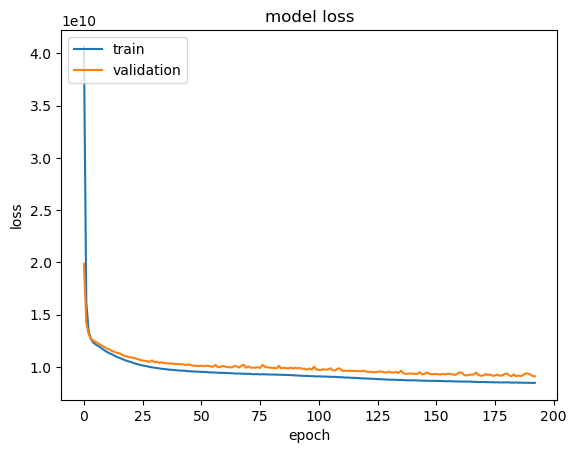

In [17]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print(scores)

729/729 [==============================] - 1s 771us/step - loss: 8521064448.0000 - mse: 8521064448.0000 - mae: 64621.0781
[8521064448.0, 8521064448.0, 64621.078125]


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared
print('Train dataset R-square:', r2_score(y_train, y_train_pred))
print('Test dataset R-square:', r2_score(y_test, y_test_pred))

# Calculate MSE
print('Train dataset MSE:', mean_squared_error(y_train, y_train_pred))
print('Test dataset MSE:', mean_squared_error(y_test, y_test_pred))

# Calculate MAE
print('Train dataset MAE:', mean_absolute_error(y_train, y_train_pred))
print('Test dataset MAE:', mean_absolute_error(y_test, y_test_pred))


243/243 [==============================] - 0s 764us/step
Train dataset R-square: 0.6406844783103582
Test dataset R-square: 0.6449022494289759
Train dataset MSE: 8521063484.108899
Test dataset MSE: 8233950030.415792
Train dataset MAE: 64621.058649852625
Test dataset MAE: 63122.53985520351


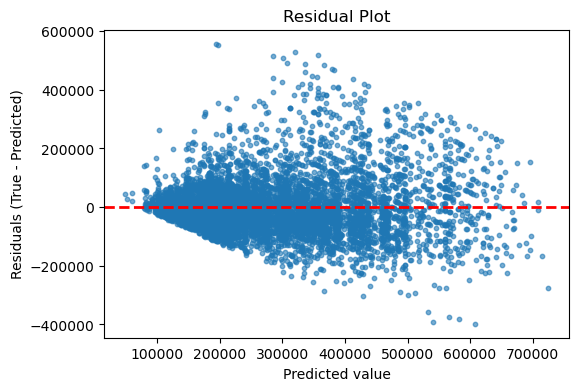

In [21]:
import matplotlib.pyplot as plt

# Reshape if necessary (assuming y_test and y_test_pred are both Pandas Series)
y_test = y_test.to_numpy().reshape(-1, 1)  # Reshape to match y_test_pred shape
residuals = y_test - y_test_pred

# Create a residual plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, residuals, s=10, alpha=0.6)
plt.xlabel('Predicted value')
plt.ylabel('Residuals (True - Predicted)')
plt.axhline(0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot')
plt.show()


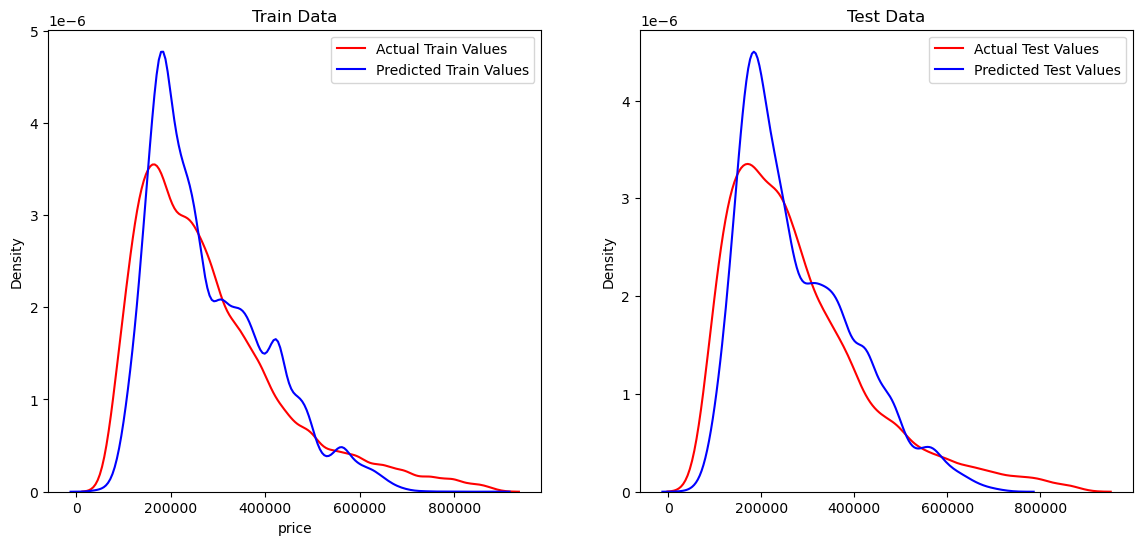

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(y_train_pred, hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)
ax1.set_title('Train Data')
ax1.legend()

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(y_test_pred, hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)
ax2.set_title('Test Data')
ax2.legend()

plt.show()